---
title: Homework 4
jupyter: python3
---


This assignment will continue to use the American Community Survey (ACS) from the US Census.
You will need to refer to the documentation to know what the ACS variable names mean. You can find a copy of the codebook in the [Lab 4 folder on Google Drive](https://drive.google.com/drive/u/0/folders/1jkY0mTxBhwOvvCJE_CJ3LWiOr_9V1ojZ)


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
acs = pd.read_csv("./pums_short.csv.gz")

## Question 1: Working with missing data

### Q1.a

In the previous lab we counted the number of missing values for the `"RNTP"` column using

In [3]:
acs["RNTP"].isna().sum() + acs["VALP"].isna().sum()

np.int64(300372)

In [4]:
print(len(acs))

276632


The sum of the missing values in "RNTP" and "VALP" are greater than the total number of rows in all of 'acs'.

In [5]:
(acs["VALP"].isna() | acs["RNTP"].isna()).mean()

np.float64(1.0)

In [6]:
owners = acs[acs["VALP"].notna()]

print(len(owners))
print(acs["VALP"].notna().sum())

178988
178988


In [7]:
proportion_missing_hincp_owners = owners["HINCP"].isna().mean()
print(proportion_missing_hincp_owners)

median_hincp_owners = owners["HINCP"].median()
print(median_hincp_owners)

owners["HINCP"].fillna(median_hincp_owners, inplace=True)

owners["HINCP"].isna().sum()

0.01331932867007844
75000.0


np.int64(0)

In [ ]:
renters = acs[acs["RNTP"].notna()]

print(len(renters))

median_rntp_renters = renters["RNTP"].median()
print(median_rntp_renters)

renters["HINCP"].fillna(median_hincp_owners, inplace=True)

73904
880.0


In [ ]:
from cmath import sqrt

mean_deviations = owners["HINCP"] - owners["HINCP"].mean()
owners_variance = mean_deviations.pow(2).mean()


owners["HINCP"].mean(),owners["HINCP"].median(),owners["HINCP"].quantile(0.75)- owners["HINCP"].quantile(0.25), sqrt(owners_variance)

(np.float64(103101.59041946946),
 np.float64(75000.0),
 np.float64(85100.0),
 (107811.09305535036+0j))

In [ ]:
mode_hincp_owners = owners["HINCP"].value_counts().head(1)
mode_hincp_renters = renters["HINCP"].value_counts().head(1)

print("Mode of HINCP for owners:", mode_hincp_owners)
print("Mode of HINCP for renters:", mode_hincp_renters)

Mode of HINCP for owners: HINCP
75000.0    3287
Name: count, dtype: int64
Mode of HINCP for renters: HINCP
75000.0    4572
Name: count, dtype: int64


In [11]:
owners["HINCP"].std(), renters["HINCP"].std()

(np.float64(107811.39422510703), np.float64(64591.622417504324))

<Axes: xlabel='NP', ylabel='Count'>

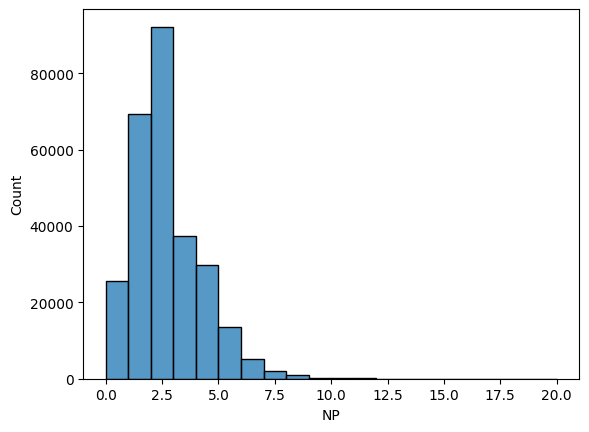

In [12]:
sb.histplot(acs["NP"], bins=20)

The location, or the typical value is around 2.0-2.5, and since the graph is skewed to the right, the spread is higher than the location since more values are higher than the median.

In [ ]:
acs["NP"].mean(), acs["NP"].median(), acs["NP"].quantile(0.75) - acs["NP"].quantile(0.25), acs["NP"].std(), sum(((acs["NP"] - acs["NP"].mean())**3) / acs["NP"].count() / (acs["NP"].std()**3))

(np.float64(2.208764712686891),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(1.5263892280571307),
 1.129330534996136)

<Axes: xlabel='NP'>

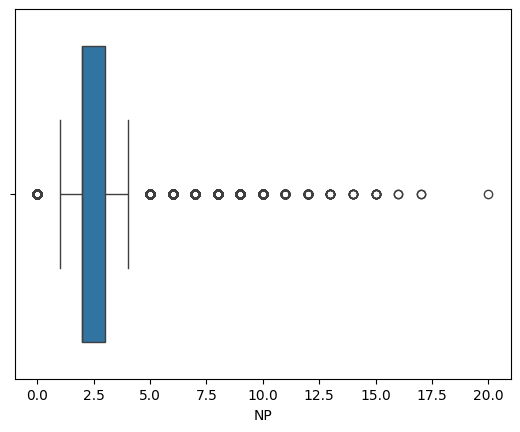

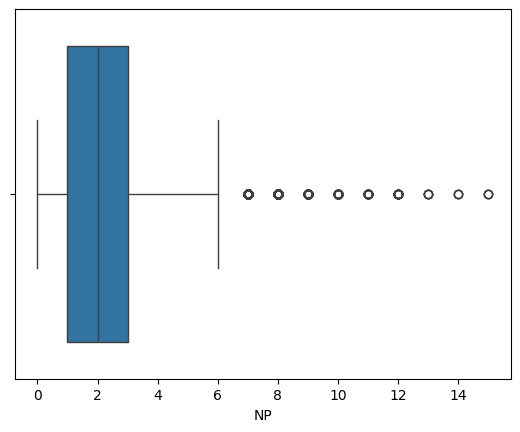

In [14]:
plt.figure()
sb.boxplot(data=owners, x="NP")
plt.figure()
sb.boxplot(data=renters, x="NP")


For the table 'renters', more values of "NP" are closer to the mean and within the IQR of the mean. For 'owners', there is many more outliers to the right and most likely has a greater right skew than 'renters' does. While the mean is about the same for both tables, there is greater variance within the 'owners' table.

In [ ]:
o = ((owners["NP"].size - 1 * owners["NP"].std() ** 2).sum())
r = ((renters["NP"].size - 1 * renters["NP"].std() ** 2).sum())

pooled_std = np.sqrt((o + r) / (owners["NP"].size + renters["NP"].size - 2))

pooled_std

differnce_in_means = owners["NP"].mean() - renters["NP"].mean() / pooled_std

differnce_in_means


np.float64(0.29652618336162506)

The effect size is medium, so there is a medium size difference between the mean of "NP" of owners and "NP" or renters.

Repeat for the `"VALP"` column. (If you want, you can compute both totals simultaneously.)

Print out the total number of rows in the `acs` table. What do you notice about the total number of rows and the sum of the missing values for these two columns?



### Q1.b

Write a single line of code that proves that 100% of observations are missing either the `"VALP"` or `"RNTP"` measurements.


### Q1.c

The `.dropna()` method has a `subset = ['column1', 'column2']` argument that allows you to indicate which columns your want to use to control how rows are dropped from the result.

Create a table called `owners` that only includes households that have non-missing `"VALP"` entries. Print out the number of rows in this table and verify it matches the number of observations with *non-missing* `"VALP"` entries in `acs`. Hint:

### Q1.d

Using the `owners` table, what **proportion** of rows are missing `"HINCP"` values?

Find the median value of the non-missing values (hint: built in Panadas methods automatically drop missing values).

Using the `.fillna(VALUE, inplace = TRUE)` method, update the `"HINCP"` column of the `owners` table by making any missing values equal to median of the non-missing values.

Verify by showing that all of the values are not missing for `"HINCP"`.



### Q1.e

Repeat the above steps to create a table `renters` that contains only rows for people who are renting (have non-missing `RNTP` values) and median impute any missing `HINCP` values.

For both `owners` and `renters` compute the following quantities for the "HINCP" column.
- mean
- median
- IQR
- standard deviation

Which group has the higher location values? Which group has more spread? Comment briefly on what this means.


## Question 2: More on distributions

### Q2.a Distributions of number of people in the household

Create a histogram of the number of people in the household (`NP`) for the `acs` data. Use the `bins` argument to create a histogram with 20 bins. Briefly discuss the location, spread, and skew of the distribution.

### Q2.b Summaries of `NP`

Check your answers to the previous question by computing the mean, median, IQR, standard deviation, quantile skewness using the 0.25 and 0.75 quantile, and the coefficient of skewness of the `NP` column.

### Q2.c Comparing conditional distribution of NP for owners and renters

Create a side-by-side boxplot of the number of people in the household for owners and renters. What do you notice about the distributions of the number of people in the household for owners and renters?

### Q2.d Effect size of the difference in means

Compute the effect size of the difference in means of the number of people in the household for owners and renters. Use the formula for Cohen's $d$

$$d = \frac{\bar X_1 - \bar X_2}{S_p}$$

where $\bar X_1$ and $\bar X_2$ are the means of the two groups and $S_p$ is the pooled standard deviation.

Using the following table of effect sizes, how would you interpret the effect size of the difference in means of the number of people in the household for owners and renters?

| Effect size | Interpretation |
|-------------|-----------------|
| (0, 0.2]    | Small           |
| (0.2, 0.5]  | Medium          |
| (0.5, 0.1]  | Large           |
| (1, 2]      | Very large      |

## Question 3: More on means and medians

For this problem, we will investigate some theoretical properties of means and medians.

### Q3.a

We have already seen that the mean is the unique point $\bar X$ that makes $\sum_{i=1}^n (X_i - \bar X) = 0$. While we didn't introduce it as such, it is also the case that $\bar X$ is the point that **minimizes** $\sum_{i=1}^n (X_i - \bar X)^2$, the sum of squared deviations.

Using the `HINCP` column of the `acs` data, demonstrate that the sum of squared deviations from the mean is less than the sum of squared deviations from the median ($\sum_{i=1}^n (X_i - \tilde X)^2$).

Recall that `x**2` is how we square things in Python.


Both have the most typical values of 75,000. However, it shows up more in the renters tables for 'HINCP'. Owners has more spread because its standard deviation is higher, meaning the values of 'HINCP' are farther away in owners than they are in renters.

### Q3.b

Now, using $\bar X$ and $\tilde X$, compute the **sum of absolute distances**, $\sum_{i=1}^n | X_i - \bar X |$ and $\sum_{i=1}^n |X_i - \tilde X|$. Recall the `.abs()` method can compute the absolute value of a series.

### Q3.c

While we are not rising to the level of a mathematical proof, what do these result suggest about which type of measure of location would minimize the sum of absolute differences?


In [16]:

mean_hincp = acs["HINCP"].mean()
median_hincp = acs["HINCP"].median()

sum_squared_deviations_mean = ((acs["HINCP"] - mean_hincp) ** 2).sum()

sum_squared_deviations_median = ((acs["HINCP"] - median_hincp) ** 2).sum()

print(sum_squared_deviations_mean)
print(sum_squared_deviations_median)

2514930676893640.5
2693213854216370.0


In [18]:
median_abs_distance = (acs["HINCP"] - median_hincp).abs().sum()
mean_abs_distance = (acs["HINCP"] - mean_hincp).abs().sum()

print(median_abs_distance)
print(mean_abs_distance)

14508223606.0
15613409566.75057




The results would suggest that it is the median that would minimize the sum of aboslute differences. The sum of absolute differences for the median is smaller than the one for mean, making it a better measure of location for minimzing the sum of absolute differences.